In [1]:
from matplotlib import pyplot as plt
%matplotlib notebook

from ParserQuery import *
from Index import Index
from Weighter import WeighterVector, WeighterSchema3
from IRModel import Vectoriel
from Evaluation import *
from EvalIRModel import *

In [3]:
index = Index('cacm', 'cacm/cacm.txt')
weighter2 = WeighterVector(index)
weighter3 = WeighterSchema3(index)
irm2 = Vectoriel(weighter2)
irm3 = Vectoriel(weighter3)

# 1. QueryParser

In [7]:
qp = QueryParser()
qp.initFile('cacm/cacm.qry', 'cacm/cacm.rel')

In [4]:
qu = qp.nextQuery()
print(qu.text_, '\n', qu.relevants_)

        What articles exist which deal with TSS (Time Sharing System), an operating system for IBM computers? 
 [1410, 1572, 1605, 2020, 2358, 2434, 2863, 3078, 1134, 1613, 1807, 1947, 2290, 2923, 1749, 1811, 2256, 2371, 2597, 2796, 2912, 3043, 3073, 3082, 3127, 3128, 756, 1307, 1502, 2035, 2299, 2399, 2501, 2820, 1543, 2078, 2828, 1198, 1338, 1877, 1960, 2150, 2228, 2280, 2320, 2342, 2376, 2482, 2578, 2618, 2685, 2700, 2777, 2865, 2866, 2895, 2941, 3141, 3148, 2625, 2849, 3032, 2372, 2632, 2870, 2876, 3068, 3111, 3158, 3177, 46, 141, 392, 950, 1158, 1262, 1380, 1471, 1601, 1747, 1795, 2060, 2289, 2433, 2664, 2714, 2785, 2851, 2896, 3039, 3075, 3156, 1043, 1188, 1306, 1358, 1396, 1491, 1923, 2246, 2316, 2527, 2699, 2710, 2715, 2716, 2906, 2956, 3150, 1523, 2080, 2629, 115, 1223, 1231, 1551, 1625, 2495, 2579, 2897, 74, 117, 232, 776, 827, 850, 851, 852, 854, 855, 856, 857, 858, 860, 861, 862, 864, 865, 866, 1175, 1724, 1919, 1956, 1969, 1980, 1997, 2017, 2041, 2108, 2118, 2146, 2176, 21

In [4]:
qu.relevants_

[1410,
 1572,
 1605,
 2020,
 2358,
 2434,
 2863,
 3078,
 1134,
 1613,
 1807,
 1947,
 2290,
 2923,
 1749,
 1811,
 2256,
 2371,
 2597,
 2796,
 2912,
 3043,
 3073,
 3082,
 3127,
 3128,
 756,
 1307,
 1502,
 2035,
 2299,
 2399,
 2501,
 2820,
 1543,
 2078,
 2828,
 1198,
 1338,
 1877,
 1960,
 2150,
 2228,
 2280,
 2320,
 2342,
 2376,
 2482,
 2578,
 2618,
 2685,
 2700,
 2777,
 2865,
 2866,
 2895,
 2941,
 3141,
 3148,
 2625,
 2849,
 3032,
 2372,
 2632,
 2870,
 2876,
 3068,
 3111,
 3158,
 3177,
 46,
 141,
 392,
 950,
 1158,
 1262,
 1380,
 1471,
 1601,
 1747,
 1795,
 2060,
 2289,
 2433,
 2664,
 2714,
 2785,
 2851,
 2896,
 3039,
 3075,
 3156,
 1043,
 1188,
 1306,
 1358,
 1396,
 1491,
 1923,
 2246,
 2316,
 2527,
 2699,
 2710,
 2715,
 2716,
 2906,
 2956,
 3150,
 1523,
 2080,
 2629,
 115,
 1223,
 1231,
 1551,
 1625,
 2495,
 2579,
 2897,
 74,
 117,
 232,
 776,
 827,
 850,
 851,
 852,
 854,
 855,
 856,
 857,
 858,
 860,
 861,
 862,
 864,
 865,
 866,
 1175,
 1724,
 1919,
 1956,
 1969,
 1980,
 1997,
 2017

# 2. Mesures d'évaluation

In [5]:
ranking2 = irm2.getRanking(qu.text_)
ranking3 = irm3.getRanking(qu.text_)#[:40]

In [6]:
ir_list = IRList(qu, ranking3)
pr = PrecisionRecallEval()
recall, interpolated_prec = pr.eval(ir_list, 1000)
print(recall[:20], '\n', interpolated_prec[:20])

[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902] 
 [1.0, 1.0, 1.0, 1.0, 0.75, 0.75, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765]


In [7]:
print(pr.calcule_stats(ir_list))

(      doc_id     score  pertinent  true_positive  precision    rappel
0       2319  0.867497       True              1   1.000000  0.001802
1       3068  0.789747       True              2   1.000000  0.003604
2       1461  0.750583      False              2   0.666667  0.003604
3       2379  0.689731       True              3   0.750000  0.005405
4       1680  0.668482      False              3   0.600000  0.005405
5       2740  0.636694       True              4   0.666667  0.007207
6       2796  0.612848       True              5   0.714286  0.009009
7       1591  0.586818      False              5   0.625000  0.009009
8       2632  0.570435       True              6   0.666667  0.010811
9       2597  0.554342       True              7   0.700000  0.012613
10      1069  0.545748       True              8   0.727273  0.014414
11      1462  0.505474      False              8   0.666667  0.014414
12      2629  0.498763       True              9   0.692308  0.016216
13      2920  0.496

In [8]:
pm = PrecisionMeanEval()
pm.eval(ir_list)

0.20966264456176095

# 3. Plateforme d'évaluation

In [4]:
eval_irm = EvalIRModel('cacm/cacm.qry', 'cacm/cacm.rel')
results3 = eval_irm.evalModel(irm3)
results2 = eval_irm.evalModel(irm2)

In [5]:
results3['precision_recall_std']

array([0.32022538, 0.17473085, 0.12744303, 0.10476284, 0.0876926 ,
       0.07876003, 0.06715514, 0.05171506, 0.03927714, 0.03079992,
       0.02390672, 0.01690958, 0.00874621, 0.00550585, 0.00518045,
       0.00518045, 0.00522899, 0.00526003, 0.00526003, 0.00524381])

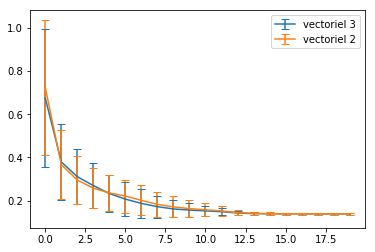

In [6]:
plt.figure()
plt.errorbar(range(20), results3['precision_recall'], yerr=results3['precision_recall_std'], capsize=4)
plt.errorbar(range(20), results2['precision_recall'], yerr=results2['precision_recall_std'], capsize=4)
plt.legend(['vectoriel 3', 'vectoriel 2'])
plt.show()

<BarContainer object of 2 artists>

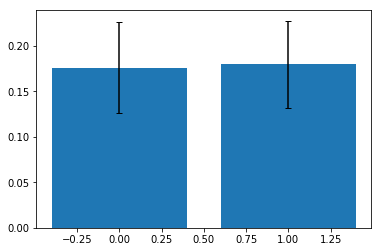

In [12]:
plt.figure()
plt.bar(range(2), [results3['precision_mean'], results2['precision_mean']],
        yerr=[results3['precision_mean_std'], results2['precision_mean_std']],
       capsize=3)